<div class="alert alert-block alert-info">
    <h1>Laboratorio III - 2024</h1>
    <h3>TP Final </h3>    
   <h5>Autores:</h5>
    <ul class="list-group">
        <li class="list-group-item"> Patricia Nuñez </li>
        <li class="list-group-item">Aureliano Chavarria</li>
        <li class="list-group-item">Gaston Larregui</li>
    </ul>
    <h5>Asignatura:</h5>    
    <ul class="list-group">
          <li class="list-group-item">Asignatura: Laboratorio III</li>
          <li class="list-group-item">Tema:  Trabajo Final</li>
          <li class="list-group-item">Profesor: Gustavo Denicolay</li>
     </ul>
</div>


# Cargar librerias

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from sklearn.metrics import mean_squared_error
import math
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

Matplotlib is building the font cache; this may take a moment.
2024-06-11 22:33:17.142043: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 22:33:25.066082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
import numpy as np

## Grenerales

In [ ]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib')
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}')

Pandas Version: 2.1.4


In [ ]:
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

Matplotlib version: 3.7.5


In [ ]:
import numpy as np

np.set_printoptions(suppress=True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.26.4


In [ ]:
# En produccion eliminar, se incluye por informacion
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Matplotlib version: 3.7.5


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Carga de Datos

In [ ]:
sell_in_path ='/home/familialarregui/buckets/b1/datasets/sell-in.txt'
tb_productos_path ='/home/familialarregui/buckets/b1/datasets/tb_productos.txt'
tb_stocks_path ='/home/familialarregui/buckets/b1/datasets/tb_stocks.txt'
prod_predecir_path ='/home/familialarregui/buckets/b1/datasets/productos_a_predecir.txt'



In [ ]:
#data = pd.read_csv(file_path)
#sell_in = pd.read_csv(sell_in_path, delimiter='\t')
df = pd.read_csv(sell_in_path, delimiter='\t')
df_productos = pd.read_csv(tb_productos_path, delimiter='\t')
df_stocks = pd.read_csv(tb_stocks_path, delimiter='\t')
df_predecir = pd.read_csv(prod_predecir_path, delimiter='\t')

# Procesamiento inicial del dataset


In [ ]:
df.head()

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.053,0.053
1,201701,10032,20524,0,1,0.136,0.136
2,201701,10217,20524,0,1,0.030,0.030
3,201701,10125,20524,0,1,0.023,0.023
4,201701,10012,20524,0,11,1.545,1.545


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945818 entries, 0 to 2945817
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   periodo                int64  
 1   customer_id            int64  
 2   product_id             int64  
 3   plan_precios_cuidados  int64  
 4   cust_request_qty       int64  
 5   cust_request_tn        float64
 6   tn                     float64
dtypes: float64(2), int64(5)
memory usage: 157.3 MB


In [ ]:
unique_counts = df.nunique()
print(unique_counts)

periodo                      36
customer_id                 597
product_id                 1233
plan_precios_cuidados         2
cust_request_qty             84
cust_request_tn          101954
tn                       101922
dtype: int64


In [ ]:
# Selección de los productos a predecir tomados de df_predecir

df_prod = df[['periodo','customer_id','product_id','plan_precios_cuidados','cust_request_qty','cust_request_tn','tn']].merge(df_predecir[['product_id']], on='product_id')

df_prod.head()

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.053,0.053
1,201701,10032,20524,0,1,0.136,0.136
2,201701,10217,20524,0,1,0.030,0.030
3,201701,10125,20524,0,1,0.023,0.023
4,201701,10012,20524,0,11,1.545,1.545


In [ ]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293481 entries, 0 to 2293480
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   periodo                int64  
 1   customer_id            int64  
 2   product_id             int64  
 3   plan_precios_cuidados  int64  
 4   cust_request_qty       int64  
 5   cust_request_tn        float64
 6   tn                     float64
dtypes: float64(2), int64(5)
memory usage: 122.5 MB


In [ ]:
unique_counts = df_prod.nunique()
print(unique_counts)

periodo                     36
customer_id                597
product_id                 780
plan_precios_cuidados        2
cust_request_qty            84
cust_request_tn          92001
tn                       91942
dtype: int64


# Predicción por Productos
Se toman los productos seleccionados y se suman las 'tn' por cada mes desde 2017 al 2019

In [ ]:
producto = df_prod.groupby(['periodo', 'product_id']).agg({'tn': 'sum'}).reset_index()
producto.head()

,periodo,product_id,tn
0,201701,20001,934.772
1,201701,20002,550.157
2,201701,20003,1063.458
3,201701,20004,555.916
4,201701,20005,494.270


In [ ]:
# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
producto['product_id'] = producto['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
df_producto = producto.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
df_producto.columns.name = None
#df_producto.head()

In [ ]:
df_producto.head()

,periodo,20001,20002,20003,20004,20005,20006,20007,20008,20009,20010,20011,20012,20013,20014,20015,20016,20017,20018,20019,20020,20021,20022,20023,20024,20025,20026,20027,20028,20029,20030,20031,20032,20033,20035,20037,20038,20039,20041,20042,20043,20044,20045,20046,20047,20049,20050,20051,20052,20053,20054,20055,20056,20057,20058,20059,20061,20062,20063,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20079,20080,20081,20082,20084,20085,20086,20087,20089,20090,20091,20092,20093,20094,20095,20096,20097,20099,20100,20101,20102,20103,20106,20107,20108,20109,20111,20112,20114,20116,20117,20118,20119,20120,20121,20122,20123,20124,20125,20126,20127,20129,20130,20132,20133,20134,20135,20137,20138,20139,20140,20142,20143,20144,20145,20146,20148,20150,20151,20152,20153,20155,20157,20158,20159,20160,20161,20162,20164,20166,20167,20168,20170,20174,20175,20176,20177,20179,20180,20181,20182,20183,20184,20187,20188,20189,20192,20193,20196,20197,20198,20200,20201,20202,20203,20205,20206,20207,20208,20209,20210,20211,20212,20213,20215,20216,20218,20219,20220,20222,20224,20225,20226,20227,20228,20230,20231,20232,20233,20234,20235,20236,20237,20238,20239,20240,20241,20242,20244,20246,20249,20251,20252,20253,20254,20255,20256,20257,20259,20261,20262,20263,20264,20265,20266,20267,20268,20269,20270,20271,20272,20273,20275,20276,20277,20278,20280,20281,20282,20283,20284,20285,20286,20288,20289,20290,20291,20292,20295,20296,20297,20298,20299,20300,20301,20302,20303,20304,20305,20306,20307,20309,20310,20311,20313,20314,20315,20316,20317,20319,20320,20321,20322,20323,20324,20325,20326,20327,20328,20329,20330,20332,20334,20335,20336,20337,20338,20340,20341,20342,20343,20344,20346,20348,20349,20350,20351,20352,20353,20354,20355,20356,20357,20358,20359,20361,20362,20364,20365,20366,20367,20368,20372,20375,20377,20378,20379,20380,20381,20382,20383,20384,20385,20386,20387,20388,20389,20390,20395,20396,20398,20400,20401,20402,20403,20404,20406,20407,20408,20409,20410,20411,20414,20415,20416,20417,20418,20419,20421,20422,20424,20426,20428,20429,20432,20433,20434,20438,20440,20442,20443,20447,20449,20450,20453,20456,20458,20459,20460,20463,20464,20465,20466,20469,20470,20473,20474,20476,20477,20478,20479,20480,20481,20482,20483,20484,20488,20490,20491,20495,20496,20497,20500,20502,20503,20505,20508,20509,20510,20513,20514,20517,20520,20521,20522,20523,20524,20525,20526,20527,20530,20531,20532,20536,20537,20538,20539,20540,20541,20542,20544,20547,20548,20549,20551,20552,20553,20555,20558,20559,20560,20561,20563,20565,20567,20568,20569,20570,20571,20572,20574,20575,20576,20577,20578,20579,20580,20583,20585,20586,20588,20589,20592,20593,20596,20597,20599,20600,20601,20602,20603,20604,20605,20606,20609,20611,20612,20614,20615,20617,20620,20621,20622,20623,20624,20627,20628,20629,20632,20633,20636,20637,20638,20639,20640,20641,20642,20644,20646,20647,20649,20651,20652,20653,20654,20655,20657,20658,20659,20660,20661,20662,20663,20664,20666,20667,20670,20672,20673,20674,20676,20677,20678,20679,20680,20681,20682,20684,20685,20686,20689,20691,20693,20694,20696,20697,20699,20700,20701,20702,20703,20705,20706,20708,20709,20711,20713,20714,20715,20719,20720,20721,20724,20729,20730,20732,20733,20735,20737,20739,20741,20742,20743,20744,20745,20746,20749,20750,20751,20754,20756,20757,20758,20759,20761,20762,20765,20768,20771,20772,20773,20774,20775,20777,20781,20783,20785,20786,20788,20789,20793,20795,20800,20801,20802,20803,20807,20809,20810,20811,20812,20815,20817,20818,20820,20822,20823,20824,20826,20827,20828,20830,20831,20832,20835,20838,20840,20843,20845,20846,20847,20849,20852,20853,20855,20859,20862,20863,20864,20865,20870,20877,20878,20879,20882,20883,20885,20886,20892,20894,20899,20901,20902,20904,20906,20907,20908,20910,20912,20913,20914,20917,20919,20920,20922,20924,20925,20927,20928,20931,20932,20933,20936,20937,20941,20942,20945,20946,20947,20948,20949,20951,20953,20956,20957,20961,20962,20965,20966,20967,20968,20970,20975,20976,2

In [ ]:
# Asegurarse de que los datos estén ordenados por periodo
df_producto = df_producto.sort_values('periodo')

In [ ]:
# Reemplazar los valores NaN por cero
df_producto = df_producto.fillna(0)

In [ ]:
df_producto.head(3)

,periodo,20001,20002,20003,20004,20005,20006,20007,20008,20009,20010,20011,20012,20013,20014,20015,20016,20017,20018,20019,20020,20021,20022,20023,20024,20025,20026,20027,20028,20029,20030,20031,20032,20033,20035,20037,20038,20039,20041,20042,20043,20044,20045,20046,20047,20049,20050,20051,20052,20053,20054,20055,20056,20057,20058,20059,20061,20062,20063,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20079,20080,20081,20082,20084,20085,20086,20087,20089,20090,20091,20092,20093,20094,20095,20096,20097,20099,20100,20101,20102,20103,20106,20107,20108,20109,20111,20112,20114,20116,20117,20118,20119,20120,20121,20122,20123,20124,20125,20126,20127,20129,20130,20132,20133,20134,20135,20137,20138,20139,20140,20142,20143,20144,20145,20146,20148,20150,20151,20152,20153,20155,20157,20158,20159,20160,20161,20162,20164,20166,20167,20168,20170,20174,20175,20176,20177,20179,20180,20181,20182,20183,20184,20187,20188,20189,20192,20193,20196,20197,20198,20200,20201,20202,20203,20205,20206,20207,20208,20209,20210,20211,20212,20213,20215,20216,20218,20219,20220,20222,20224,20225,20226,20227,20228,20230,20231,20232,20233,20234,20235,20236,20237,20238,20239,20240,20241,20242,20244,20246,20249,20251,20252,20253,20254,20255,20256,20257,20259,20261,20262,20263,20264,20265,20266,20267,20268,20269,20270,20271,20272,20273,20275,20276,20277,20278,20280,20281,20282,20283,20284,20285,20286,20288,20289,20290,20291,20292,20295,20296,20297,20298,20299,20300,20301,20302,20303,20304,20305,20306,20307,20309,20310,20311,20313,20314,20315,20316,20317,20319,20320,20321,20322,20323,20324,20325,20326,20327,20328,20329,20330,20332,20334,20335,20336,20337,20338,20340,20341,20342,20343,20344,20346,20348,20349,20350,20351,20352,20353,20354,20355,20356,20357,20358,20359,20361,20362,20364,20365,20366,20367,20368,20372,20375,20377,20378,20379,20380,20381,20382,20383,20384,20385,20386,20387,20388,20389,20390,20395,20396,20398,20400,20401,20402,20403,20404,20406,20407,20408,20409,20410,20411,20414,20415,20416,20417,20418,20419,20421,20422,20424,20426,20428,20429,20432,20433,20434,20438,20440,20442,20443,20447,20449,20450,20453,20456,20458,20459,20460,20463,20464,20465,20466,20469,20470,20473,20474,20476,20477,20478,20479,20480,20481,20482,20483,20484,20488,20490,20491,20495,20496,20497,20500,20502,20503,20505,20508,20509,20510,20513,20514,20517,20520,20521,20522,20523,20524,20525,20526,20527,20530,20531,20532,20536,20537,20538,20539,20540,20541,20542,20544,20547,20548,20549,20551,20552,20553,20555,20558,20559,20560,20561,20563,20565,20567,20568,20569,20570,20571,20572,20574,20575,20576,20577,20578,20579,20580,20583,20585,20586,20588,20589,20592,20593,20596,20597,20599,20600,20601,20602,20603,20604,20605,20606,20609,20611,20612,20614,20615,20617,20620,20621,20622,20623,20624,20627,20628,20629,20632,20633,20636,20637,20638,20639,20640,20641,20642,20644,20646,20647,20649,20651,20652,20653,20654,20655,20657,20658,20659,20660,20661,20662,20663,20664,20666,20667,20670,20672,20673,20674,20676,20677,20678,20679,20680,20681,20682,20684,20685,20686,20689,20691,20693,20694,20696,20697,20699,20700,20701,20702,20703,20705,20706,20708,20709,20711,20713,20714,20715,20719,20720,20721,20724,20729,20730,20732,20733,20735,20737,20739,20741,20742,20743,20744,20745,20746,20749,20750,20751,20754,20756,20757,20758,20759,20761,20762,20765,20768,20771,20772,20773,20774,20775,20777,20781,20783,20785,20786,20788,20789,20793,20795,20800,20801,20802,20803,20807,20809,20810,20811,20812,20815,20817,20818,20820,20822,20823,20824,20826,20827,20828,20830,20831,20832,20835,20838,20840,20843,20845,20846,20847,20849,20852,20853,20855,20859,20862,20863,20864,20865,20870,20877,20878,20879,20882,20883,20885,20886,20892,20894,20899,20901,20902,20904,20906,20907,20908,20910,20912,20913,20914,20917,20919,20920,20922,20924,20925,20927,20928,20931,20932,20933,20936,20937,20941,20942,20945,20946,20947,20948,20949,20951,20953,20956,20957,20961,20962,20965,20966,20967,20968,20970,20975,20976,2

# Primer LSTM - Predicción para todos los productos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
df_producto.head()

,periodo,20001,20002,20003,20004,20005,20006,20007,20008,20009,20010,20011,20012,20013,20014,20015,20016,20017,20018,20019,20020,20021,20022,20023,20024,20025,20026,20027,20028,20029,20030,20031,20032,20033,20035,20037,20038,20039,20041,20042,20043,20044,20045,20046,20047,20049,20050,20051,20052,20053,20054,20055,20056,20057,20058,20059,20061,20062,20063,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20079,20080,20081,20082,20084,20085,20086,20087,20089,20090,20091,20092,20093,20094,20095,20096,20097,20099,20100,20101,20102,20103,20106,20107,20108,20109,20111,20112,20114,20116,20117,20118,20119,20120,20121,20122,20123,20124,20125,20126,20127,20129,20130,20132,20133,20134,20135,20137,20138,20139,20140,20142,20143,20144,20145,20146,20148,20150,20151,20152,20153,20155,20157,20158,20159,20160,20161,20162,20164,20166,20167,20168,20170,20174,20175,20176,20177,20179,20180,20181,20182,20183,20184,20187,20188,20189,20192,20193,20196,20197,20198,20200,20201,20202,20203,20205,20206,20207,20208,20209,20210,20211,20212,20213,20215,20216,20218,20219,20220,20222,20224,20225,20226,20227,20228,20230,20231,20232,20233,20234,20235,20236,20237,20238,20239,20240,20241,20242,20244,20246,20249,20251,20252,20253,20254,20255,20256,20257,20259,20261,20262,20263,20264,20265,20266,20267,20268,20269,20270,20271,20272,20273,20275,20276,20277,20278,20280,20281,20282,20283,20284,20285,20286,20288,20289,20290,20291,20292,20295,20296,20297,20298,20299,20300,20301,20302,20303,20304,20305,20306,20307,20309,20310,20311,20313,20314,20315,20316,20317,20319,20320,20321,20322,20323,20324,20325,20326,20327,20328,20329,20330,20332,20334,20335,20336,20337,20338,20340,20341,20342,20343,20344,20346,20348,20349,20350,20351,20352,20353,20354,20355,20356,20357,20358,20359,20361,20362,20364,20365,20366,20367,20368,20372,20375,20377,20378,20379,20380,20381,20382,20383,20384,20385,20386,20387,20388,20389,20390,20395,20396,20398,20400,20401,20402,20403,20404,20406,20407,20408,20409,20410,20411,20414,20415,20416,20417,20418,20419,20421,20422,20424,20426,20428,20429,20432,20433,20434,20438,20440,20442,20443,20447,20449,20450,20453,20456,20458,20459,20460,20463,20464,20465,20466,20469,20470,20473,20474,20476,20477,20478,20479,20480,20481,20482,20483,20484,20488,20490,20491,20495,20496,20497,20500,20502,20503,20505,20508,20509,20510,20513,20514,20517,20520,20521,20522,20523,20524,20525,20526,20527,20530,20531,20532,20536,20537,20538,20539,20540,20541,20542,20544,20547,20548,20549,20551,20552,20553,20555,20558,20559,20560,20561,20563,20565,20567,20568,20569,20570,20571,20572,20574,20575,20576,20577,20578,20579,20580,20583,20585,20586,20588,20589,20592,20593,20596,20597,20599,20600,20601,20602,20603,20604,20605,20606,20609,20611,20612,20614,20615,20617,20620,20621,20622,20623,20624,20627,20628,20629,20632,20633,20636,20637,20638,20639,20640,20641,20642,20644,20646,20647,20649,20651,20652,20653,20654,20655,20657,20658,20659,20660,20661,20662,20663,20664,20666,20667,20670,20672,20673,20674,20676,20677,20678,20679,20680,20681,20682,20684,20685,20686,20689,20691,20693,20694,20696,20697,20699,20700,20701,20702,20703,20705,20706,20708,20709,20711,20713,20714,20715,20719,20720,20721,20724,20729,20730,20732,20733,20735,20737,20739,20741,20742,20743,20744,20745,20746,20749,20750,20751,20754,20756,20757,20758,20759,20761,20762,20765,20768,20771,20772,20773,20774,20775,20777,20781,20783,20785,20786,20788,20789,20793,20795,20800,20801,20802,20803,20807,20809,20810,20811,20812,20815,20817,20818,20820,20822,20823,20824,20826,20827,20828,20830,20831,20832,20835,20838,20840,20843,20845,20846,20847,20849,20852,20853,20855,20859,20862,20863,20864,20865,20870,20877,20878,20879,20882,20883,20885,20886,20892,20894,20899,20901,20902,20904,20906,20907,20908,20910,20912,20913,20914,20917,20919,20920,20922,20924,20925,20927,20928,20931,20932,20933,20936,20937,20941,20942,20945,20946,20947,20948,20949,20951,20953,20956,20957,20961,20962,20965,20966,20967,20968,20970,20975,20976,2

In [ ]:
df_producto = df_producto.drop(columns=['periodo'])

In [ ]:
# Crear un nuevo dataframe para guardar las predicciones
predictions = pd.DataFrame(columns=['product_id', 'tn'])

In [ ]:
# Función para crear una estructura de datos adecuada para LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# Iterar sobre cada columna de producto
for product_id in df_producto.columns[0:]:
    # Usar solo la columna del producto actual
    data = df_producto[[product_id]].values

    # Normalizar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Crear el dataset con una ventana de tiempo (time_step)
    time_step = 3
    X, y = create_dataset(scaled_data, time_step)

    # Dividir los datos en entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    test_size = len(X) - train_size
    X_train, X_test = X[0:train_size], X[train_size:len(X)]
    y_train, y_test = y[0:train_size], y[train_size:len(y)]

    # Redimensionar datos para que sean compatibles con LSTM [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Construir el modelo LSTM
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    history = model.fit(X_train, y_train, batch_size=1, epochs=20)

    # Predecir el mes de febrero de 2020
    last_data = scaled_data[-time_step:]
    last_data = last_data.reshape((1, time_step, 1))
    pred_202002 = model.predict(last_data)
    pred_202002 = scaler.inverse_transform(pred_202002)
    print(f'Predicción para {product_id} en 202002: {pred_202002[0][0]:.2f} toneladas')

    # Guardar la predicción en el nuevo dataframe usando concat
    new_row = pd.DataFrame({'product_id': [product_id], 'tn': [pred_202002[0][0]]})
    predictions = pd.concat([predictions, new_row], ignore_index=True)


    # Guardar las predicciones en un archivo CSV
    predictions.to_csv('/home/familialarregui/buckets/b1/exp/06_pred_202002.txt', index=False)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0964
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0588
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0382
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0396
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0342
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0392
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378    
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0425
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0461    
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0518
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0332
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0540
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0265
Epoch 16/20

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2009
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0267
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0479
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0347
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0418    
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0409
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0583
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0499
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0313    
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0417
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0415
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0486
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0232
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0334
Epoch 16/20
25/25 ━━━━

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0397
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0539
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0412
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257
Epoch 16/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0323
Epoch 17/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0304
Epoch 18/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345
Epoch 19/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0544
Epoch 20/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Predicción para 20402 en 202002: 14.26 toneladas
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1253    
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0650
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0520
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0470  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Predicción para 20563 en 202002: 5.30 toneladas
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1257
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0674    
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0513
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0408
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0746    
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0840
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0432
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0504
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0516
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0676    
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0438
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0683    
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Predicción para 20673 en 202002: 0.09 toneladas
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0000e+00
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.9981e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0179e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0616e-05
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8790e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1802e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7512e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2415e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1912e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1637e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3947e-05
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7210e-04
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0839e-05
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7189e-04
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0163e-04
Epoch 15/20
25/25 ━━━━━━━━━━━

# Resultados Kaggle

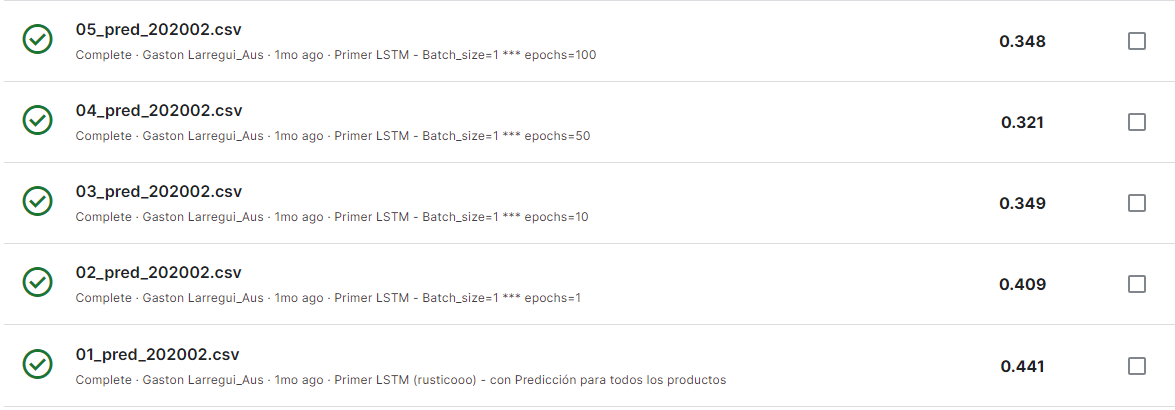